In [2]:
import os
import io
from copy import deepcopy
from pathlib import Path
from PIL import Image as PILImage
import cv2
import numpy as np

from IPython.display import display, Audio
from ipywidgets import widgets, interact

from some_utils.photo_utils import exif_rotate, get_photo, get_centermost_detections
from ocr.google_api import save_cuts_for_detection, detect_text, draw_ocr
import ocr.ocr_utils as ocr_fcns

home_dir = os.getcwd()
# print(home_dir)
print("Welcome!")

Welcome!


In [3]:
# imports from yolo directory

# TODO: make it simple, this is workaround
os.chdir(Path(home_dir, "yolov5"))
from model import Model
os.chdir(home_dir)
#print(home_dir)

In [4]:
# pricetag model
yolo_price_weight_path = str(Path("yolov5", "weights", "pricetag_small.pt"))
yolo_price_model = Model(yolo_price_weight_path, device="cpu")  # ~ 0.2s on CPU 

# product name and price model
yolo_price_weight_path = str(Path("yolov5", "weights", "kaufland_name_price_small_320.pt"))
yolo_product_name_model = Model(yolo_price_weight_path, device="cpu")  # ~ 0.2s on CPU 
yolo_product_name_model.img_size = 320

print("Models loaded")

Models loaded


In [13]:
### run testing photos in cycle, go through all and draw results 
# from copy import deepcopy
#import unidecode

# a list where ocr-read product names and prices will be stored
# for all centermost pricetags in dir_in
# taglist = list()

#dir_in = "./test_pricetag_images/tibor_rogphoneII"

#dir_out = "./test_pricetag_images_out/tibor_rogphoneII"

#if not os.path.exists(dir_out):
#    os.mkdir(dir_out)

#for i in os.listdir(dir_in):
#    if not i.endswith("jpg"):
#        continue
#    try:
#        im_name = os.path.join(dir_in, i)
#
#        im_file = exif_rotate(PILImage.open(im_name))
#        
#         # detected pricetags
#        det_pricetags = yolo_price_model.detect([np.array(im_file)],  mode="return")

#         # selected pricetags cropped from the entire photo
#        sel_pricetags = get_centermost_detections(im_file,
#                                                  det_pricetags,
#                                                  n=1,
#                                                  mode="cut",
#                                                  bigger_box_by_pct=0.0
#                                                 )
        #sel_pricetags = [np.array(im_file)]

        # detected product name and price bounding boxes (from a single pricetag)
#        det_product_name = yolo_product_name_model.detect([sel_pricetags[0]],  mode="return")
        
        # selected name and price bounding boxes (at most 3 assumed in a photo)
        # TODO: without using get_centermost_detec
 #       sel_pricetag_parts = get_centermost_detections(sel_pricetags[0],
 #                                                      det_product_name,
 #                                                      n=4,
 #                                                      mode="cut",
 #                                                      bigger_box_by_pct=0.0,
 #                                                      centerpoint=np.array([0,0]),
 #                                                      )

        # paths to images cut to the bounding boxes of price and product name
#        cuts_path = save_cuts_for_detection(sel_pricetag_parts)
        
        # outputs of the OCR for each the image cuts (cuts with product names or prices)
#        cuts_ocr = [detect_text(path) for path in cuts_path]
        
#         # find price
#         price = ocr_fcns.find_detection_using_yolo(
#             cuts_ocr[0],
#             det_product_name,
#             yolo_product_name_model.names,
#             "price",
#             what_to_ignore=None,
#             n_to_return=1
#         )
#         # fcn returns text and bbox, print only text
#         result_price = " ".join(price[0])

#         # find product_name
#         product_name = ocr_fcns.find_detection_using_yolo(
#             google_detections=cuts_ocr[0],
#             yolo_detections=det_product_name,
#             yolo_classes=yolo_product_name_model.names,
#             what_to_find="product_name",
#             what_to_ignore="price",
#             n_to_return=3
#         )
        # fcn returns text and bbox, print only text
#         result_product_name = " ".join(product_name[0])

#         text = f"{result_product_name}: {result_price}"
        
        # append ocr info in the form [[product name], [price]]
#        taglist.append([cuts_ocr[0][1], cuts_ocr[1][1]])
#         out = cv2.putText(
#             deepcopy(sel_pricetags[0]),
#             unidecode.unidecode(text), 
#             (10, int(sel_pricetags[0].shape[0]*0.95)), 
#             cv2.FONT_HERSHEY_SIMPLEX, 
#             1,
#             (0,255,0),
#             2
#         )
        # assumes only one output photo per per input photo
#         PILImage.fromarray(out).save(os.path.join(dir_out,i))
    
    
#    except Exception as e:
#        print(f"Error {i}: {e}")
    

Error P_20210225_202116.jpg: list index out of range
Error P_20210225_202732.jpg: list index out of range


In [16]:
# import re

In [17]:
# help(re.sub)

Help on function sub in module re:

sub(pattern, repl, string, count=0, flags=0)
    Return the string obtained by replacing the leftmost
    non-overlapping occurrences of the pattern in string by the
    replacement repl.  repl can be either a string or a callable;
    if a string, backslash escapes in it are processed.  If it is
    a callable, it's passed the match object and must return
    a replacement string to be used.



In [14]:
#tagdict = dict()
#for tag in taglist:
#    try:
#        if len(tag[1]) == 0:
#            tag[1] = "empty"
#        if len(tag[0]) == 0:
#            tag[0] = "empty"
#        name = re.sub('\n', ' ', tag[0][0])
#        price = re.sub('\n', ' ', tag[1][0])
#        tagdict[name] = price
#    except:
#        tagdict[tag[0]] = tag[1]

In [15]:

# lets try some "big hlavicka" heuristics for price strings update!
#tagdict2 = dict()
#nums = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "0"]
#pers = [".", ",", ":"]

#for tag in tagdict.items():
#    price = ""
    # starting to add nums and pers until there is another letter -> break the for cycle
#    for val in tag[1]:
        # we want to start with a num
#        if val in nums:
#            price += val
        # if there is a "." for example add there are already some num added, add it as well
#        elif val in pers and len(price) > 0:
#            price += val
        # if nothing was added yet, continue
#        elif not price:
#            continue
        # else break the cycle
#        else:
#            break
#    tagdict2[tag[0]] = price

In [16]:
# tagdict2

{'pom. - máta ': '36.90',
 'Korunni cukr kostky CL ': '29.90',
 'Avokádo Mořská sůl ': '19.90',
 'Tohamia Sokt Brut ': '1090',
 "Lay's Stix ": '39.90',
 'Biophar med květový ': '',
 'Tehibo Cafissimo- Kávové kapsle ': '99.90',
 'Sterbucks Nespresso ': '99.90',
 'jemča Ovocný čaj VOC ': '20.90',
 'Pickwick Ovocný čaj ': '45.90',
 'FACKELMANN Konvička ng mléko ': '99.90',
 'Sejkr objem: 0,74| ': '84.90',
 'Inovecký salám ': '',
 'Athentikos Jogurt ': '17.90',
 'OLMA Smetanový jogurt 10% ': '19.90',
 'К-Blo Jogurt ovocnŷ ': '1.90',
 'z červené řepy ': '19.90',
 'Znojmia Směs Sm ': '35.90',
 'ఇ Komiésniey ': '36.90',
 'Pralinky ': '129.90',
 'Orlon Atellệr Pralinky ': '129.90',
 'Storck Toffifee ее ': '109.90',
 'Toffifee dezert ': '149.',
 'Golden Snack Ghost snack ': '21.90',
 'Chips ': '15.90',
 "Lemond'or Citron ": '39.90',
 'Aquila Jedový čaj ': '29.90',
 'Rajec kyslik ': '15.90',
 'Strongbow igbor Cider 4,5% ': '16.90',
 'Budvar 33 Světlý ležák ': '25.90',
 'Pivo ': '16.90',
 'Kinder

In [17]:

#import json

#with open("kaufland_price_name_test.json", "w+") as f:
#    json.dump(tagdict2,f, ensure_ascii=False, indent=4)

In [14]:
# tagdict

{'Figaro Cokslada ': '25.90 ',
 'Figaro Čokoláda ': '25.90 (100 a - 2878 ',
 'Sport Mléčná čokoláda ': '29.90 ',
 'e': '42.90 ',
 'Fige ': '49.90 ',
 'Ritter Sport Čokoláda ': '29.90 ',
 'Figaro Cokolāda ': '25.90 (100 g 28.78 ',
 'Figaro Cakolöda ': '25.90 ',
 'Figaro takolado ': '21.90 ',
 'Trumpf Schogetten nda ': 'Schoo ',
 'Figaro Mléčná čokoláda ': 'okoláda 25.90 (100 g - 28 78 ',
 'Igaro Cokoláda ': '25.90 (100 a - 28 7 ',
 'Figaro Hořká čokoláda ': 'koláda 25.90 (100 g - 2872 ',
 'Toblerone Čokoláda ': '34.90 100 a - ',
 'Toblerone Vybér čakolád ': '129.90 ',
 'Ritter Sport Cokoláda ': '29.90 ',
 'Zokolddo ': '63. ',
 'Toblerone čokoláda ': '34.90 000 0- 34.90 ',
 'Tr ': '23.90 ',
 '2. g24 ': '4055770 ',
 'Milka čokoláda ': '32.90 ',
 'Milka Cokoláda ': '32.90 ',
 'Milka Čekoláda ': '99.90 マ770 ',
 'Milka Mil ': '29.90 ',
 'Milka Happy Cow ': '32.90 ',
 'Milka Čokoláda ': '32.90 ',
 'Milka Triple Čokoláda ': 'e',
 'Ika okoláda ': '99.90 ',
 'Hello VIVA Nápoj ': '26.90 ',
 'Stáv

(4032, 3024, 3)
0.127 s
2 pricetags found


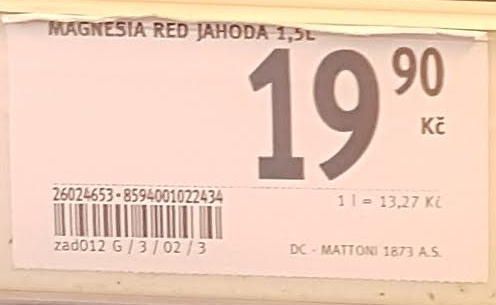

In [5]:
### TESTING CELL, COMMENT FOR VOILA USE
# 20200826_090817 
# 20200714_174205
# 20200714_174224
#im_file = exif_rotate(PILImage.open("./test_images/20200714_174224.jpg"))
#print(np.array(im_file)
#      .shape)

# det_pricetags = yolo_price_model.detect([np.array(im_file)],  mode="draw")
# display(PILImage.fromarray(det_pricetags))

#det_pricetags = yolo_price_model.detect([np.array(im_file)],  mode="return")
#print(f"{len(det_pricetags['cls'])} pricetags found")

#det_pricetags["rois"]

#sel_pricetags = get_centermost_detections(im_file, det_pricetags, n=1, mode="cut", bigger_box_by_pct=0.01)
#display(PILImage.fromarray(sel_pricetags[0]))


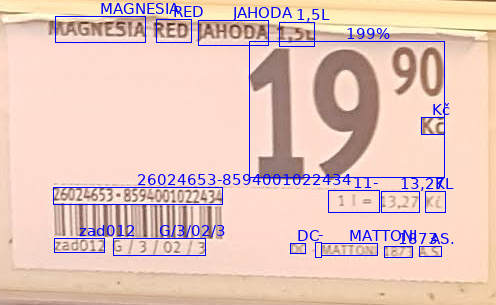

In [6]:

### TESTING CELL, COMMENT FOR VOILA USE
# RUN OCR
#cuts_path = save_cuts_for_detection(sel_pricetags)
#cuts_ocr = [detect_text(path) for path in cuts_path]
#cuts_ocr[0]
# draw 
#uts_drawn = [draw_ocr(ocr) for ocr in cuts_ocr]
#display(cuts_drawn[0])
# 0,0 in top
# (left_top_col, left_top_row), (right_top_col,right_top_row), (right_bottom_col, right_bottom_row), (left_bottom_col,left_bottom_col)

In [8]:

### TESTING CELL, COMMENT FOR VOILA USE

# detect price and product name with yolo model, only the first pricetag
#det_product_name = yolo_product_name_model.detect([sel_pricetags[0]],  mode="return")
# display(PILImage.fromarray(det_product_name))
#print(det_product_name)
# print(yolo_product_name_model.names)

0.048 s
{'rois': array([[          7,          44,          48,         319],
       [         38,         241,         185,         452]], dtype=float32), 'conf': array([     0.9157,     0.95927], dtype=float32), 'cls': array([1, 0])}


In [9]:

### TESTING CELL, COMMENT FOR VOILA USE

# find price
#price = ocr_fcns.find_detection_using_yolo(
#    cuts_ocr[0],
#    det_product_name,
#    yolo_product_name_model.names,
#    "price",
#    what_to_ignore=None,
#    n_to_return=2
#)
# fcn returns text and bbox, print only text
#print(" ".join(price[0]))

# find product_name
#product_name = ocr_fcns.find_detection_using_yolo(
#    google_detections=cuts_ocr[0],
#    yolo_detections=det_product_name,
#    yolo_classes=yolo_product_name_model.names,
#    what_to_find="product_name",
#    what_to_ignore="price",
#    n_to_return=2
#)
# fcn returns text and bbox, print only text
#print(" ".join(product_name[0]))


199% Kč
MAGNESIA MATTONI


In [18]:
nums = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "0"]
pers = [".", ",", ":"]

In [7]:
def callback(value):
    if btn_upload.data:

        
        # =============================================================================
        # INITIALIZE IMAGE
        # =============================================================================

        print("You upload a file:")
        im_file = get_photo(btn_upload, False)
        #im_file = PILImage.open(io.BytesIO(btn_upload.data[-1]))
        
        #display(im_file)
        #print(np.array(im_file).shape)  
        # =============================================================================
        # DETECT PRICES
        # =============================================================================
        try:
            det_pricetags = yolo_price_model.detect([np.array(im_file)],  mode="return")
            
            # =============================================================================
            # CUT PRICES
            # =============================================================================        
            
            # returns list of n centermost pricetags. To return only coordinates, use mode="return" 
            cuts = get_centermost_detections(im_file, det_pricetags, n=1, mode="cut",bigger_box_by_pct=0.01)
            print(f"{len(det_pricetags['cls'])} pricetags found, working with centermost pricetag")
            display(PILImage.fromarray(cuts[0]))
            
            # TODO: filter pricetag and read it
            
            # =============================================================================
            # READ PRICETAGS
            # =============================================================================   
            
            # saving cuts to be able to run Google API detection (custom load)
            cuts_path = save_cuts_for_detection(cuts)
            #print(cuts_path)

            # run Google API text detection and OCR
            cuts_ocr = [detect_text(path) for path in cuts_path]
            # cuts_drawn = [draw_ocr(ocr) for ocr in cuts_ocr]
            # display(cuts_drawn[0])
            # [os.remove(path) for path in cuts_path]
            #print(cuts_ocr)

            # =============================================================================
            # CLASSIFY DETECTIONS
            # =============================================================================   
            
            # detect price and product name with yolo model, only the first pricetag
            det_product_name = yolo_product_name_model.detect([cuts[0]],  mode="return")
            #print(det_product_name)

            # find price by intersectiong google results with yolo detections
            price = ocr_fcns.find_detection_using_yolo(
                cuts_ocr[0],
                det_product_name,
                yolo_product_name_model.names,
                "price",
                what_to_ignore=None,
                n_to_return=2
            )
            
            price = " ". join(price[0])

            # find product_name similarly
            product_name = ocr_fcns.find_detection_using_yolo(
                google_detections=cuts_ocr[0],
                yolo_detections=det_product_name,
                yolo_classes=yolo_product_name_model.names,
                what_to_find="product_name",
                what_to_ignore="price",
                n_to_return=2
            )

            # filter price value
            cena = ""
            # starting to add nums and pers until there is another letter -> break the for cycle
            for val in price:
                # we want to start with a num
                if val in nums:
                    cena += val
                # if there is a "." for example add there are already some num added, add it as well
                elif val in pers and len(cena) > 0:
                    cena += val
                # if nothing was added yet, continue
                elif not cena:
                    continue
                # else break the cycle
                else:
                    break

            # print results 
            print(" ".join(product_name[0]))      
            #print(" ".join(price[0]))
            print(cena)
        except:
            print("Nedokážu přečíst obrázek, zkuste to prosím znovu.")
        
    return

In [8]:
btn_upload = widgets.FileUpload()

In [9]:
_ = interact(callback, value=btn_upload)

interactive(children=(FileUpload(value={}, description='Upload'), Output()), _dom_classes=('widget-interact',)…